In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasett/dataset (2).csv


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

In [120]:
data = pd.read_csv('/kaggle/input/datasett/dataset (2).csv')

# **EDA и ресерч-анализ**

In [121]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [11]:
#Информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [122]:
#Описательная статистика
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [12]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [16]:
#удаляем из датасета пропущенные значение
data = data.dropna()

In [17]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Популярность по трекам

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


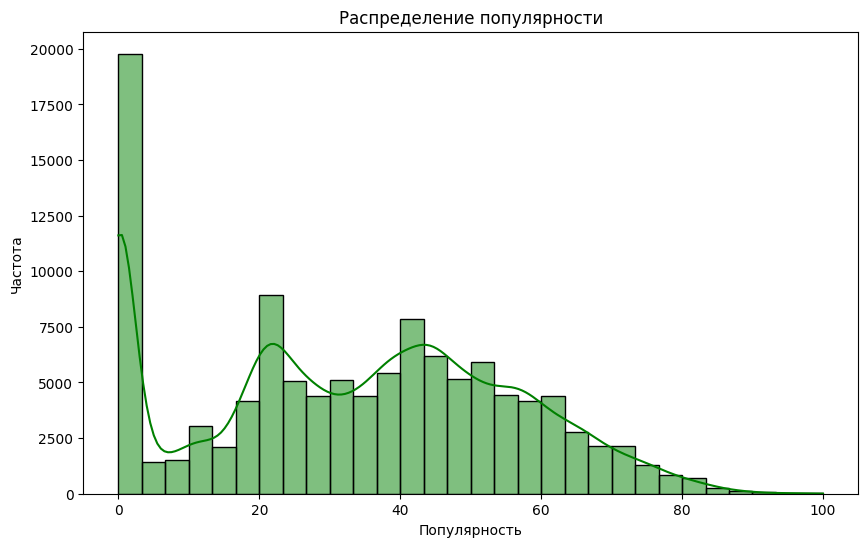

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=30, kde=True, color='green')
plt.title('Распределение популярности')
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.show()

Анализ гистограммы позволяет заключить, что распределение популярности треков неравномерно. Наблюдается значительное количество треков (примерно 20 000) с нулевой популярностью, что, вероятно, соответствует действительности и не является ошибкой в данных. При этом треков с популярностью, близкой к 100, очень мало, что также представляется логичным. На графике выделяются два пика: первый — при популярности 23±1 (10 000 треков), второй — при популярности 44±1 (10 000 треков). Это указывает на то, что в датасете присутствует большое количество треков с умеренной популярностью, что свидетельствует о наличии у них определённой аудитории. Кроме того, заметен равномерный спад числа треков при значениях популярности выше 50.

**Зависимость популярности от продолжительности трека**

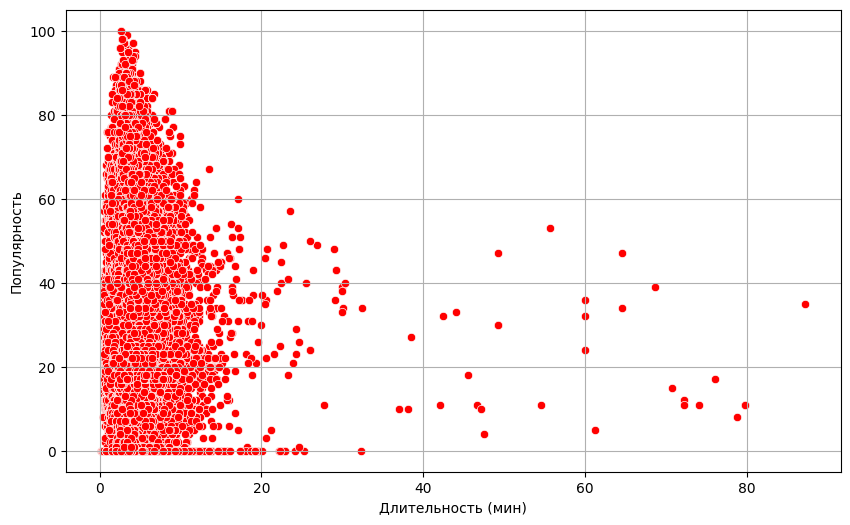

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['duration_ms'] / 60000, y=data['popularity'], color='red')
plt.xlabel('Длительность (мин)')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

На основе графика можно сделать вывод, что наибольшей популярностью пользуются треки, продолжительность которых составляет от 2 до 5 минут. При этом треки длительностью более 20 минут не достигают популярности выше 60. Также на графике видны единичные случаи треков с длительностью свыше 20 минут, и все они имеют популярность менее 60. Треки с популярностью в диапазоне от 0 до 50 отличаются наибольшим разбросом по длительности, однако их популярность распределена относительно равномерно. В целом, большинство треков в датасете имеют длительность не более 10–15 минут

 Зависмиость популярности от жанра

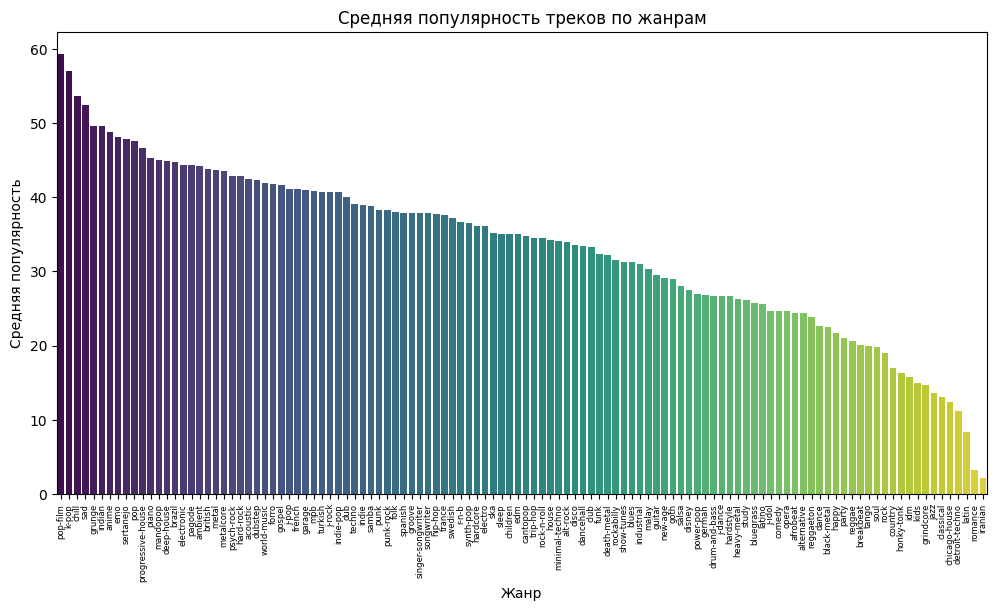

In [32]:
genre_popularity = data.groupby('track_genre')['popularity'].mean().reset_index()
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='track_genre', y='popularity', data=genre_popularity, palette='viridis')

# Добавляем заголовок и метки
plt.title('Средняя популярность треков по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=90, fontsize=6)  # Поворачиваем подписи по оси X для удобства чтения

# Показываем график
plt.show()

График неудачный, сделаем выборку из 10 популярных и их 10 непопулярных

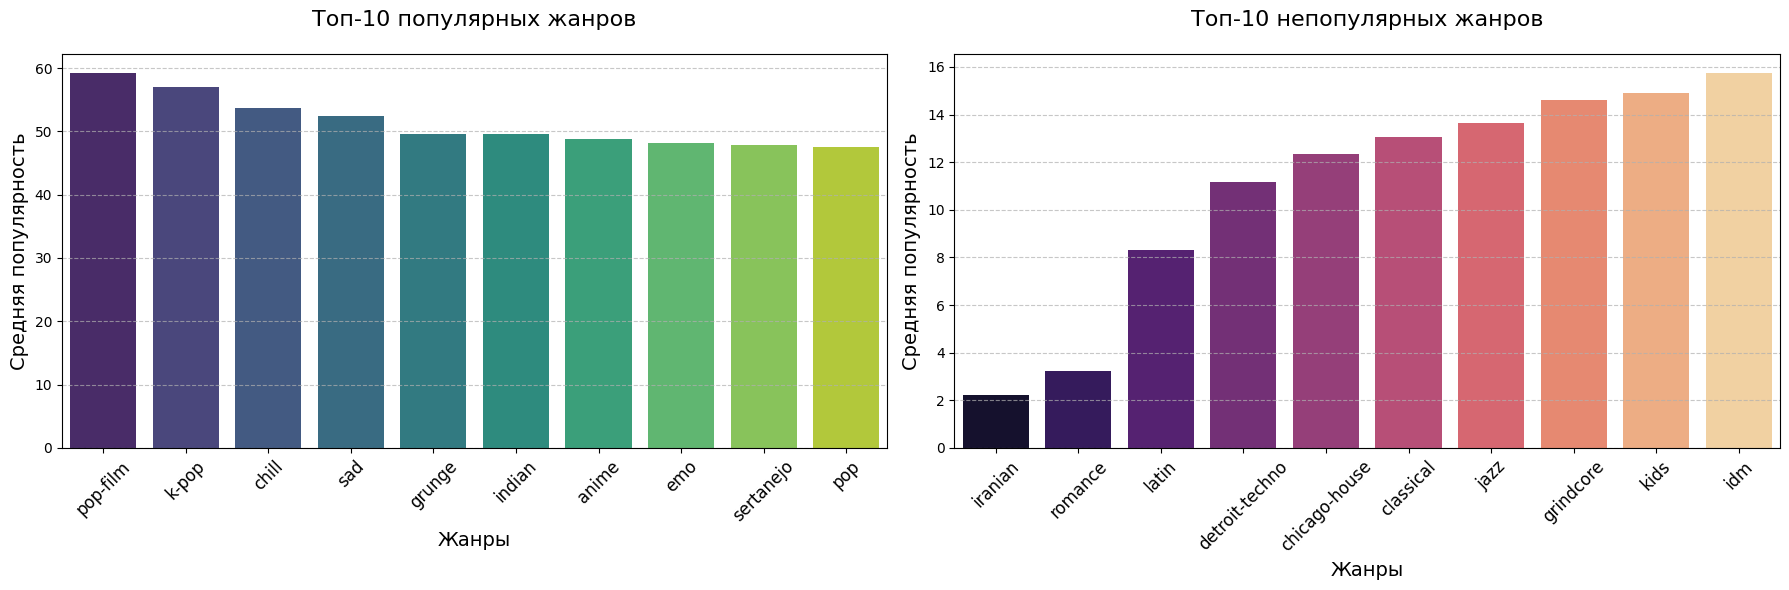

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Группируем данные по жанру и вычисляем среднюю популярность
genre_popularity = data.groupby('track_genre')['popularity'].mean()

# Топ-10 популярных и непопулярных жанров
top_10_popular = genre_popularity.nlargest(10)
top_10_unpopular = genre_popularity.nsmallest(10)

# Создаем фигуру с двумя подграфиками
plt.figure(figsize=(18, 6))

# График для топ-10 популярных жанров
plt.subplot(1, 2, 1)
sns.barplot(x=top_10_popular.index, y=top_10_popular.values, palette='viridis')
plt.title('Топ-10 популярных жанров', fontsize=16, pad=20)
plt.xlabel('Жанры', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Поворот подписей для удобства чтения
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# График для топ-10 непопулярных жанров
plt.subplot(1, 2, 2)
sns.barplot(x=top_10_unpopular.index, y=top_10_unpopular.values, palette='magma')
plt.title('Топ-10 непопулярных жанров', fontsize=16, pad=20)
plt.xlabel('Жанры', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Поворот подписей для удобства чтения
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Улучшаем расположение графиков
plt.tight_layout()

# Показываем графики
plt.show()

Анализ графиков позволяет сделать вывод, что жанр оказывает значительное влияние на популярность песен. Например, жанр pop-film занимает лидирующую позицию с популярностью 59, в то время как iranian является наименее популярным, набрав всего 2 балла. Разрыв между ними составляет 57 баллов, что подчеркивает существенную разницу в востребованности этих жанров. Кроме того, можно заметить, что популярность треков снижается довольно резко при переходе от одного жанра к другому, что указывает на неравномерное распределение интереса аудитории в зависимости от музыкального направления.

Зависмиость популярности от цензурности

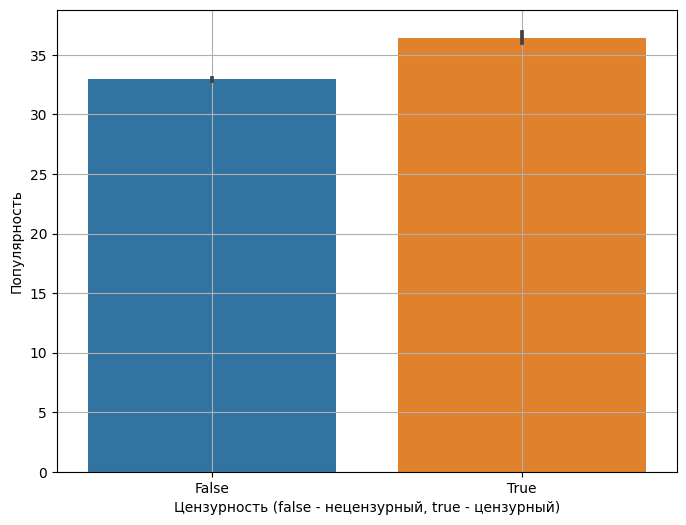

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data['explicit'], y=data['popularity'])
plt.xlabel('Цензурность (false - нецензурный, true - цензурный)')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

Из анализа видно, что наличие нецензурных слов в треках оказывает влияние на их популярность, снижая её в среднем на 5 пунктов. Однако это снижение не столь существенно. 

Зависмиость популярности от громкости

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


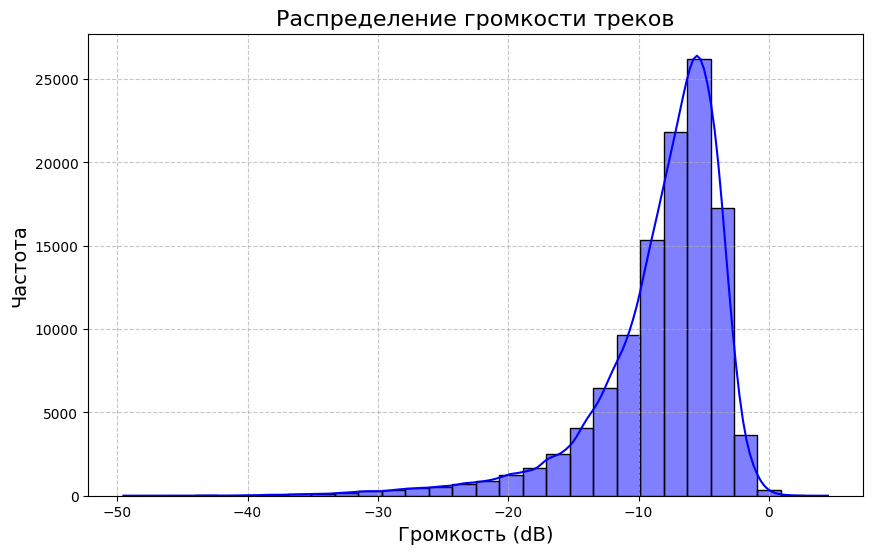

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data['loudness'], bins=30, kde=True, color='blue')

# Добавляем заголовок и метки
plt.title('Распределение громкости треков', fontsize=16)
plt.xlabel('Громкость (dB)', fontsize=14)
plt.ylabel('Частота', fontsize=14)

# Добавляем сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Показываем график
plt.show()

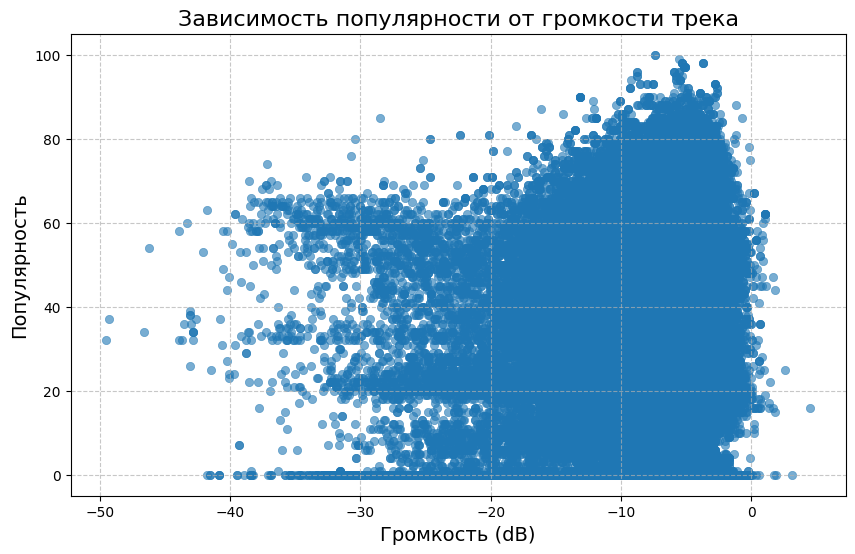

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='popularity', data=data, alpha=0.6, edgecolor=None)

# Добавляем заголовок и метки
plt.title('Зависимость популярности от громкости трека', fontsize=16)
plt.xlabel('Громкость (dB)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)

# Добавляем сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Показываем график
plt.show()

Распределение треков по громкости оказалось неравномерным. Заметно, что треков с громкостью меньше -25 значительно меньше по сравнению с остальными. Также наблюдается резкое снижение максимальной популярности треков при громкости -10 и ниже, однако начиная с отметки -20 этот показатель стабилизируется. Наибольшую популярность демонстрируют треки с громкостью -5±1.

Зависмиость популярности от модальности

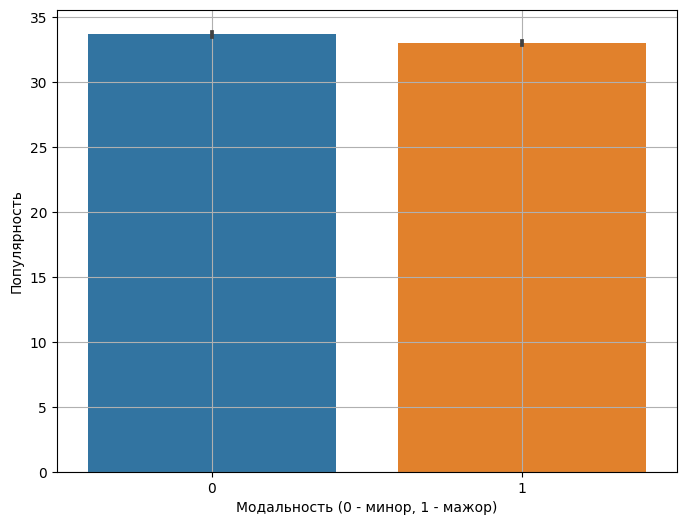

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data['mode'], y=data['popularity'])
plt.xlabel('Модальность (0 - минор, 1 - мажор)')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

Видим, что модальность не влияет на популярность 

Зависмиость популярности от временной сигнатуры

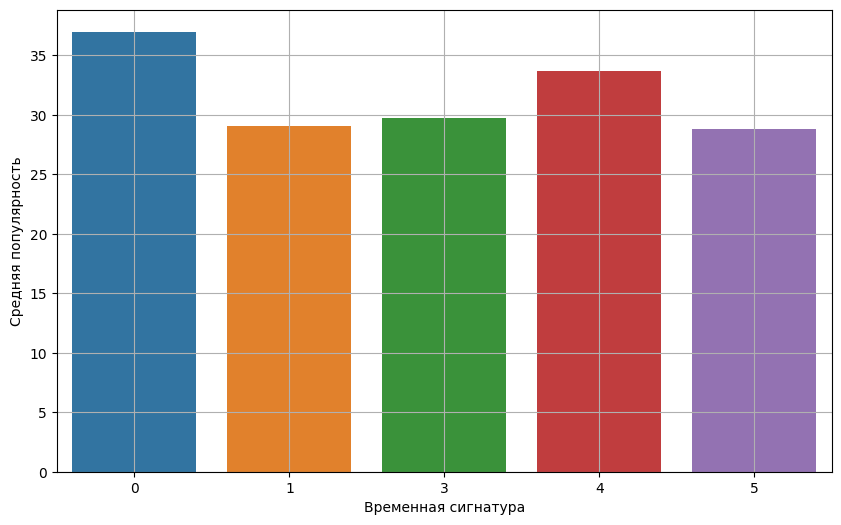

In [50]:
plt.figure(figsize=(10, 6))
popularity = data.groupby('time_signature')['popularity'].mean().sort_index()
sns.barplot(x=popularity.index, y=popularity.values)
plt.xlabel('Временная сигнатура')
plt.ylabel('Средняя популярность')
plt.grid(True)
plt.show()

Из анализа видно, что средняя популярность треков немного выше при значениях временной сигнатуры 0 и 4. Однако разница между максимальным и минимальным показателями составляет менее 10 пунктов, что позволяет сделать вывод: временная сигнатура не оказывает существенного влияния на популярность треков.

Зависмиость популярности от темпа трека

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


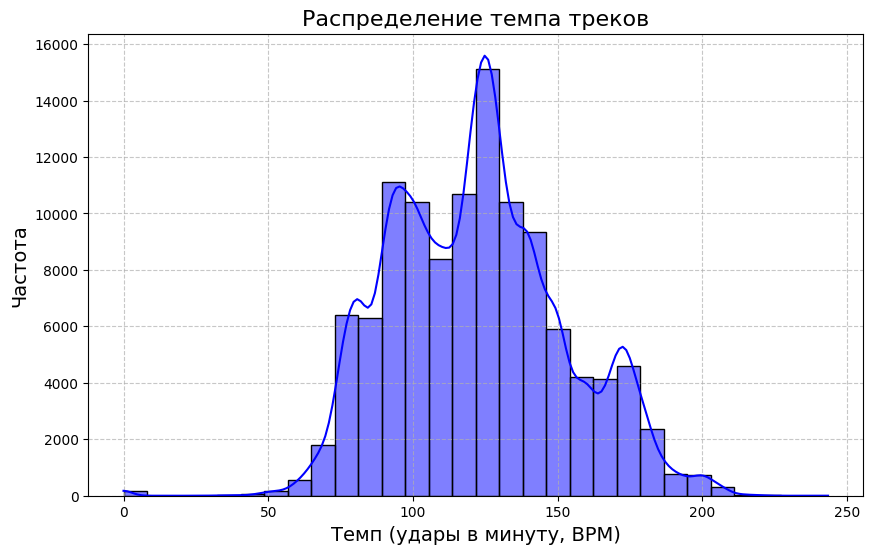

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data['tempo'], bins=30, kde=True, color='blue')

# Добавляем заголовок и метки
plt.title('Распределение темпа треков', fontsize=16)
plt.xlabel('Темп (удары в минуту, BPM)', fontsize=14)
plt.ylabel('Частота', fontsize=14)

# Добавляем сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Показываем график
plt.show()

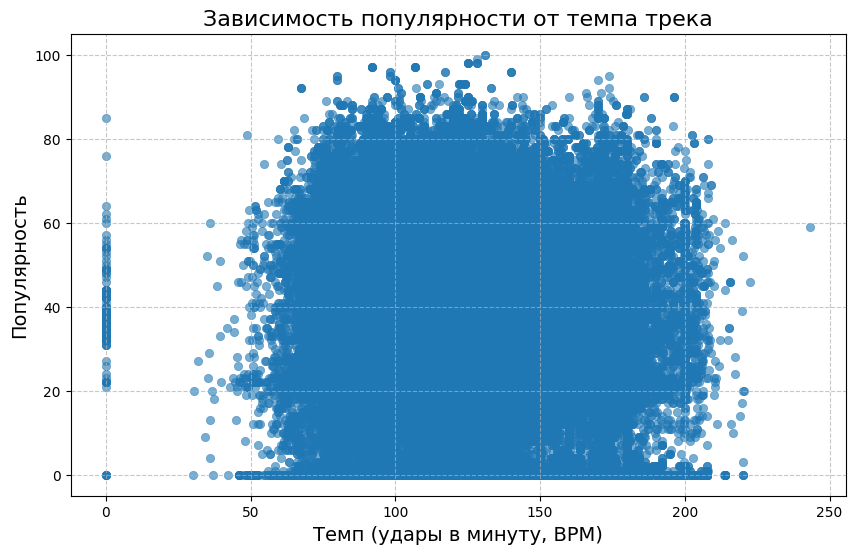

In [51]:
# Создаем график
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='popularity', data=data, alpha=0.6, edgecolor=None)

# Добавляем заголовок и метки
plt.title('Зависимость популярности от темпа трека', fontsize=16)
plt.xlabel('Темп (удары в минуту, BPM)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)

# Добавляем сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Показываем график
plt.show()

Чёткой зависимости между темпом трека и его популярностью выявить не удаётся, так как распределение популярности выглядит довольно равномерным. Треки с темпом до 150 имеют незначительно более высокую популярность по сравнению с теми, чей темп превышает это значение.

Зависмиость популярности от энергичности 

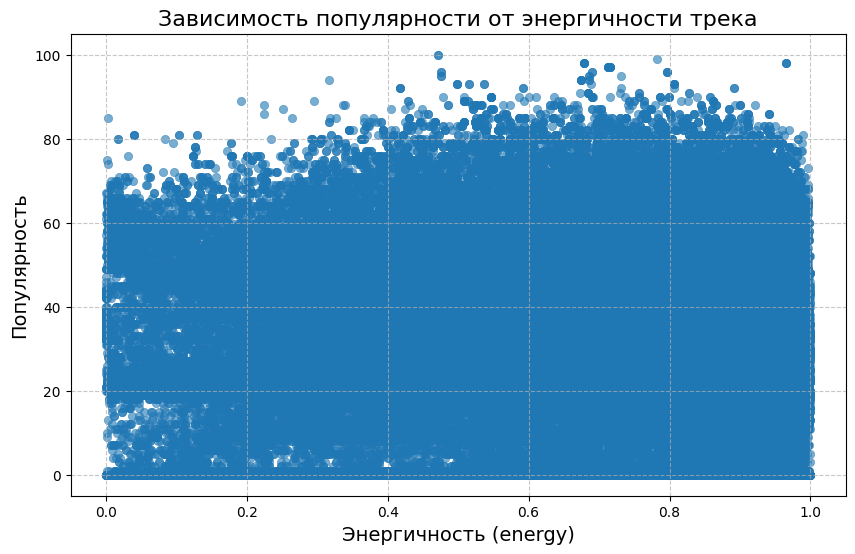

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='popularity', data=data, alpha=0.6, edgecolor=None)

# Добавляем заголовок и метки
plt.title('Зависимость популярности от энергичности трека', fontsize=16)
plt.xlabel('Энергичность (energy)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)

# Добавляем сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Показываем график
plt.show()

Распределение популярности треков в зависимости от их энергичности является равномерным и не предоставляет много информации для анализа. Однако можно отметить, что треки с популярностью близкой к 90 встречаются при значении энергичности более 0.2, а с популярностью близкой к 100 — при энергичности более 0.5. 

Зависмиость популярности от живости

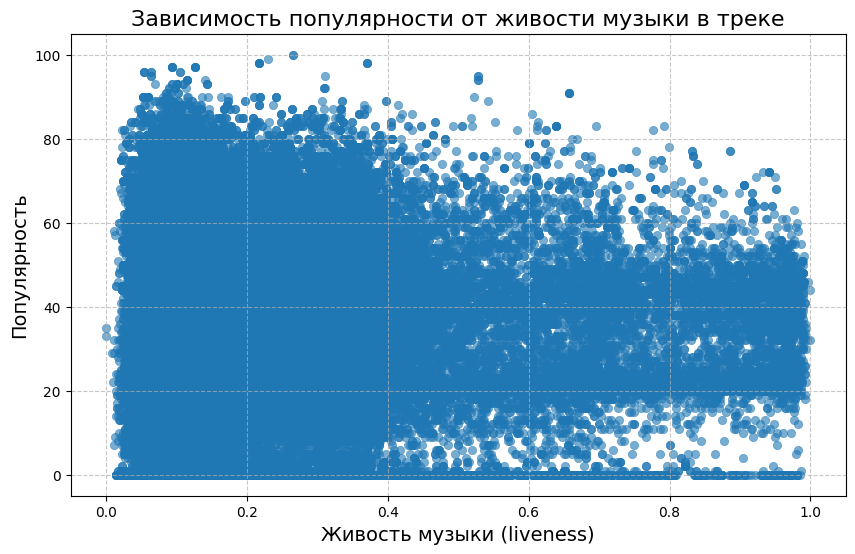

In [57]:
# Создаем график
plt.figure(figsize=(10, 6))
sns.scatterplot(x='liveness', y='popularity', data=data, alpha=0.6, edgecolor=None)

# Добавляем заголовок и метки
plt.title('Зависимость популярности от живости музыки в треке', fontsize=16)
plt.xlabel('Живость музыки (liveness)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)

# Добавляем сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Показываем график
plt.show()

Анализ графика позволяет заметить, что с увеличением показателя живости наблюдается снижение как количества треков, так и их максимальной популярности. Это говорит о том, что большинство слушателей отдают предпочтение более спокойной музыке.

Исследуем корреляцию между числовыми признаками, чтобы выявить мультиколлинеарность и важные признаки для прогнозирования популярности.

In [62]:
# Выбираем категориальные столбцы
categorical_cols = data.select_dtypes(include=['object']).columns

# Применяем Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Сохраняем кодировщик для обратного преобразования

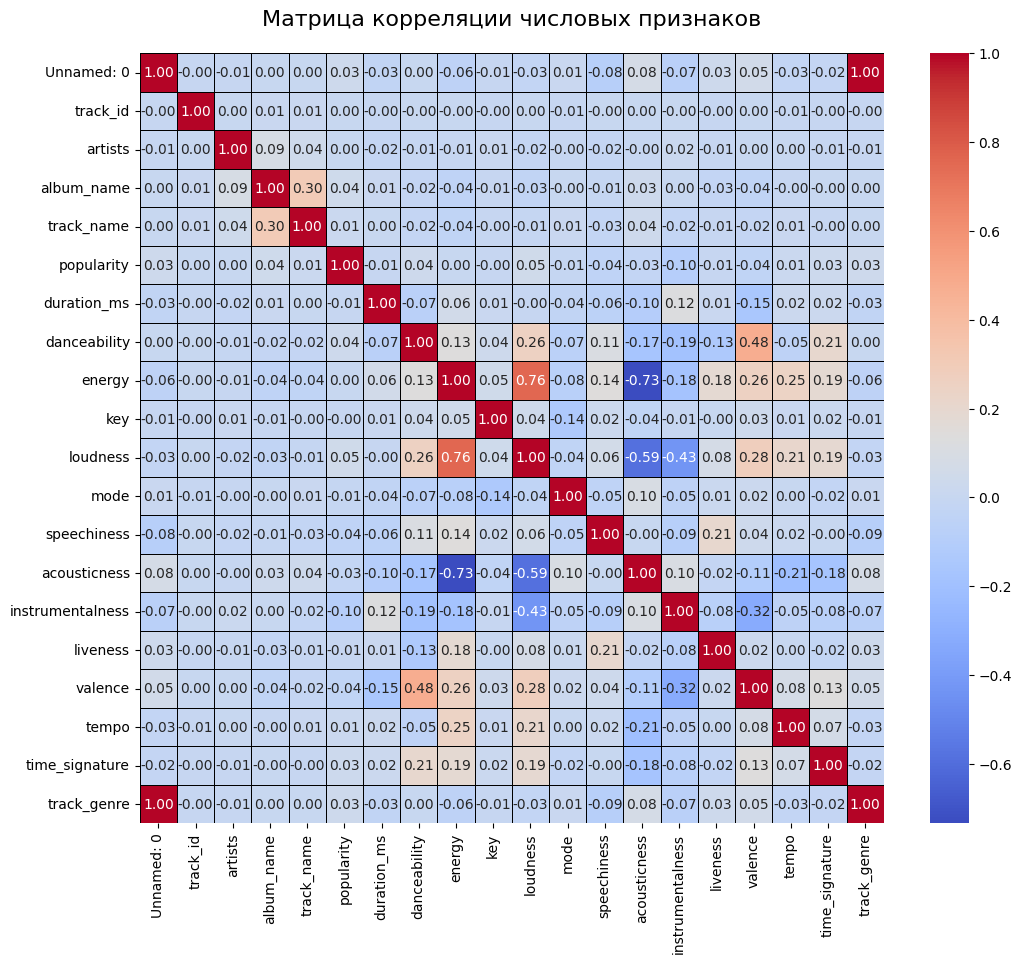

In [64]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Создаем матрицу корреляции
corr_matrix = numerical_features.corr()

# Визуализация тепловой карты корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')

# Добавляем заголовок
plt.title('Матрица корреляции числовых признаков', fontsize=16, pad=20)

# Показываем график
plt.show()

На матрице можно увидеть, какие признаки сильно коррелируют друг с другом и с популярностью.

# **Feature Engineering**

In [73]:
# Создаем новые признаки

#Сумма танцевальности и энергичности
data['danceability_energy_sum'] = data['danceability'] + data['energy']
#Сумма акустичности и инструментальности
data['acousticness_instrumentalness_sum'] = data['acousticness'] + data['instrumentalness']
#Произведение валентности и темпа
data['valence_tempo_product'] = data['valence'] * data['tempo']
#Отношение громкости к энергичности
data['loudness_energy_ratio'] = data['loudness'] / (data['energy'] + 1e-10)
#Сумма речи и живости
data['speechiness_liveness_sum'] = data['speechiness'] + data['liveness']

In [75]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,track_genre,danceability_energy_sum,acousticness_instrumentalness_sum,valence_tempo_product,loudness_energy_ratio,speechiness_liveness_sum
0,0,62845,10357,8100,11741,73,230666,False,0.676,0.4610,...,0.3580,0.715,87.917,4,0,1.1370,0.032201,62.860655,-14.633406,0.5010
1,1,55667,3287,14796,22528,55,149610,False,0.420,0.1660,...,0.1010,0.267,77.489,4,0,0.5860,0.924006,20.689563,-103.825301,0.1773
2,2,19766,12397,39162,60774,57,210826,False,0.438,0.3590,...,0.1170,0.120,76.332,4,0,0.7970,0.210000,9.159840,-27.114206,0.1727
3,3,77941,14839,8580,9580,71,201933,False,0.266,0.0596,...,0.1320,0.143,181.740,3,0,0.3256,0.905071,25.988820,-310.654362,0.1683
4,4,68241,5255,16899,25689,82,198853,False,0.618,0.4430,...,0.0829,0.167,119.949,4,0,1.0610,0.469000,20.031483,-21.853273,0.1355


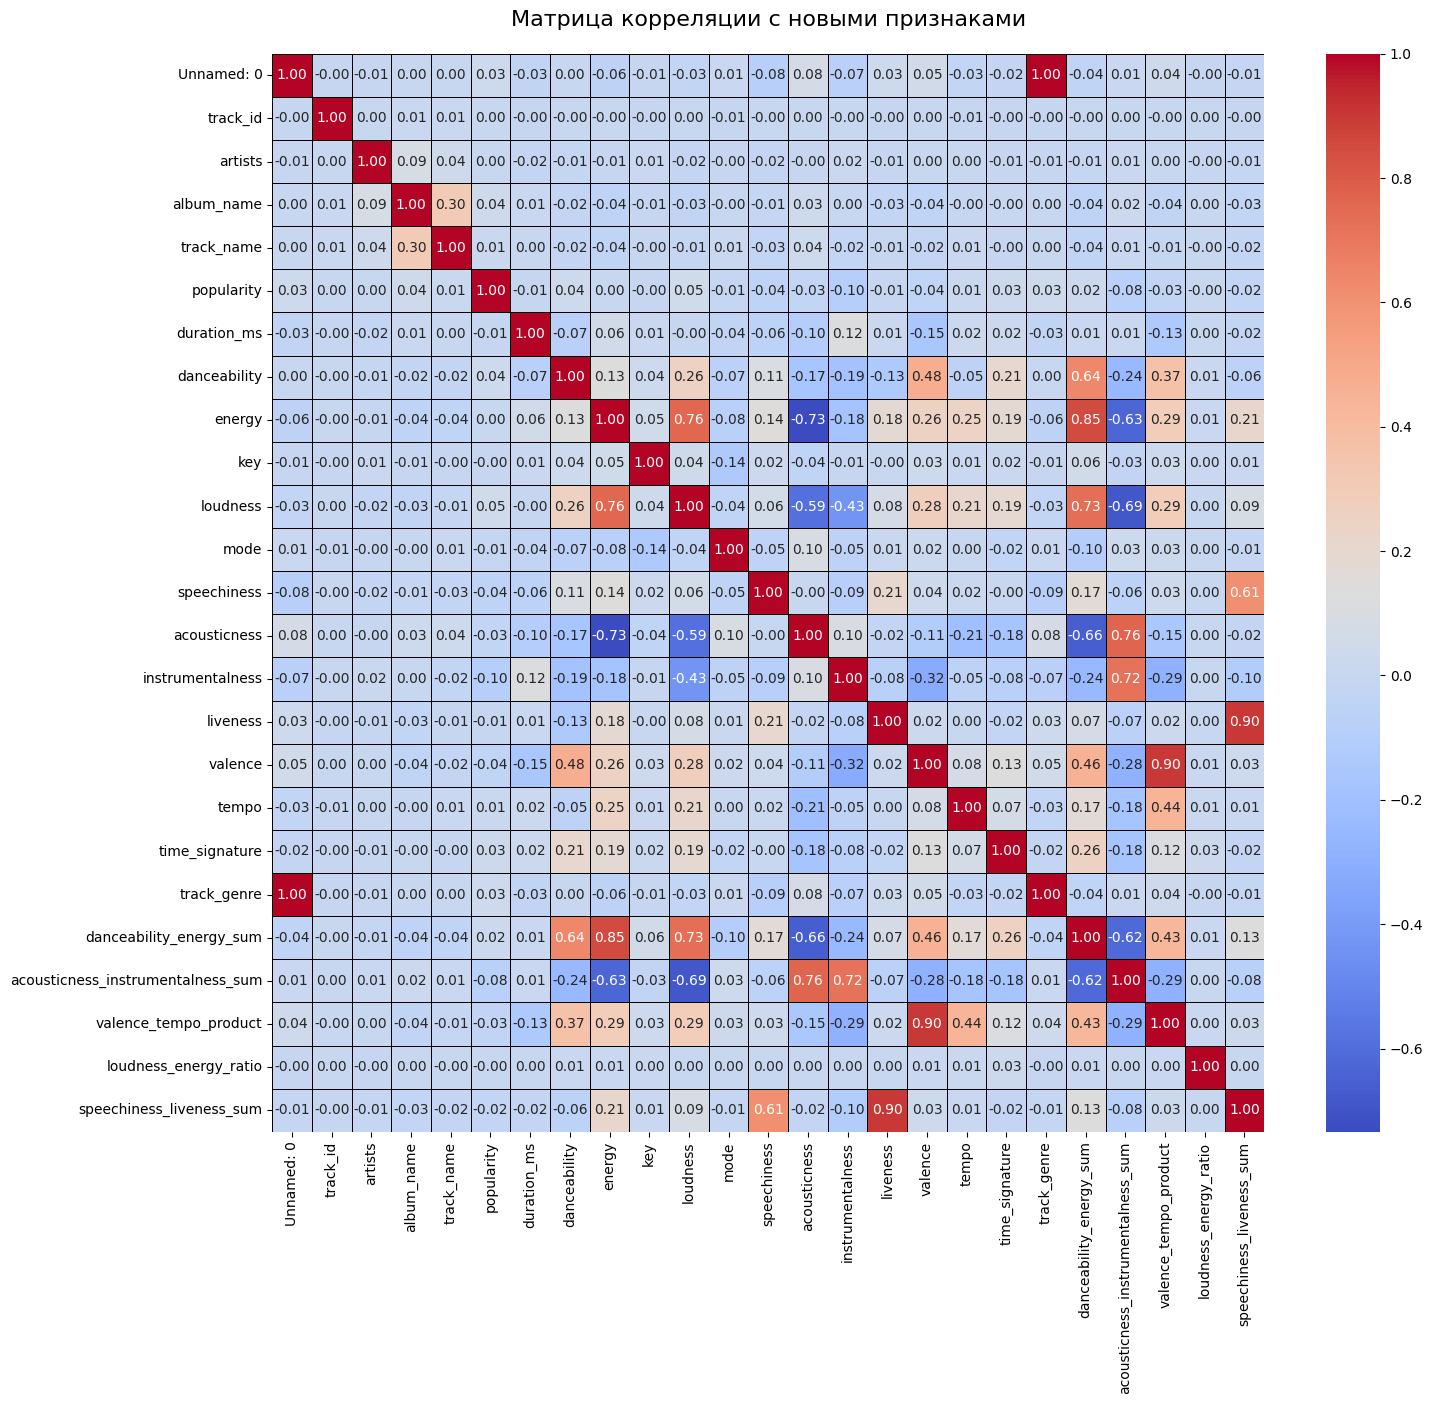

In [88]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# 3. Создаем матрицу корреляции
corr_matrix = numerical_data.corr()

# 4. Визуализация тепловой карты
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')

# Добавляем заголовок
plt.title('Матрица корреляции с новыми признаками', fontsize=16, pad=20)

# Показываем график
plt.show()

ВЫВОД: Наибольшая корреляция наблюдается между параметрами loudness и energy, acousticness и acousticness_instrumentalness_sum. Они составляют 0.76 и значит данные параметры наиболее созавсимы. Можно сделать вывод что энергичные треки более громкие. Также вторыми параметрами имеющими наибольшую корреляционную зависимость являются valence и danceability - 0,48. Что тоже является логичным. Отрицательная корреляция озночает, что признак никак не влияет на популярность.

Корреляция признаков с популярностью. Исклбчим признак "популярность", так как он даст 1, что бессмысленно при корреляции.

Корреляция признаков с популярностью:
instrumentalness                     0.095147
acousticness_instrumentalness_sum    0.079444
loudness                             0.050420
speechiness                          0.044930
explicit                             0.044078
album_name                           0.042501
valence                              0.040522
danceability                         0.035444
track_genre                          0.032696
Unnamed: 0                           0.032146
valence_tempo_product                0.032085
time_signature                       0.031076
acousticness                         0.025458
speechiness_liveness_sum             0.024485
danceability_energy_sum              0.019789
mode                                 0.013948
tempo                                0.013212
track_name                           0.011935
duration_ms                          0.007129
liveness                             0.005397
key                                  0.003

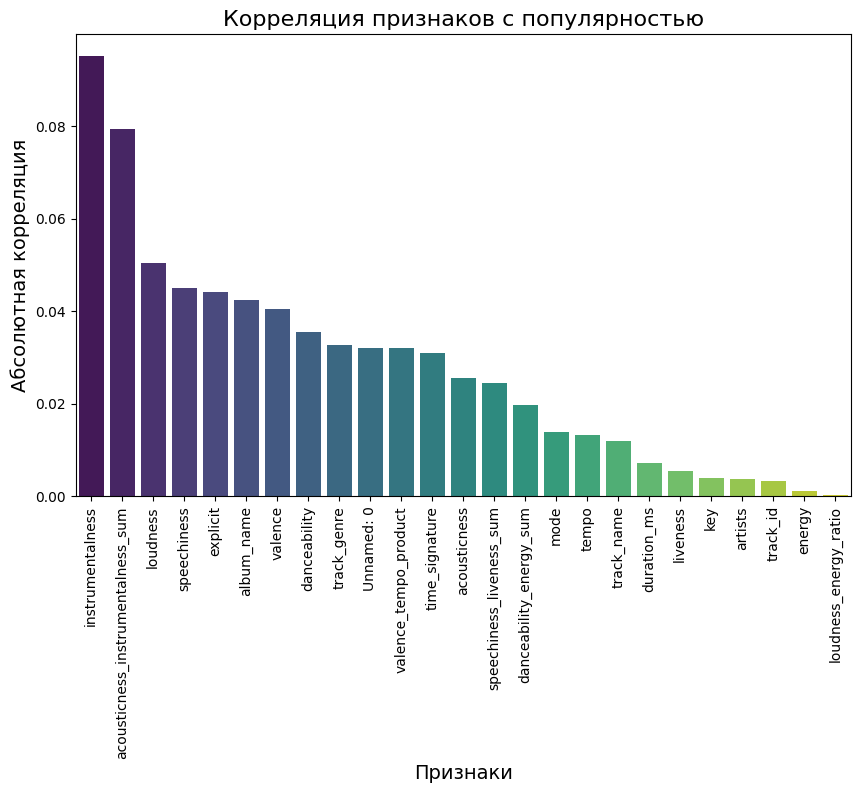

In [91]:
correlation_with_target = data.corr()['popularity'].drop('popularity')

# 2. Сортируем по убыванию абсолютного значения корреляции
correlation_with_target_sorted = correlation_with_target.abs().sort_values(ascending=False)

# Выводим результат
print("Корреляция признаков с популярностью:")
print(correlation_with_target_sorted)

# 3. Визуализация (опционально)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target_sorted.index, y=correlation_with_target_sorted.values, palette='viridis')
plt.title('Корреляция признаков с популярностью', fontsize=16)
plt.xlabel('Признаки', fontsize=14)
plt.ylabel('Абсолютная корреляция', fontsize=14)
plt.xticks(rotation=90)  # Поворачиваем подписи по оси X для удобства чтения
plt.show()